In [1]:
import numpy as np
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

In [2]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [3]:
train.corr() #온도,풍속,오존,가시성이 긍정적 영향,습도&비&미세먼지는 부정적 영향

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [4]:
y_train=train['count']
x_train=train.drop(['count','id'],axis=1)
x_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [5]:
x_train['hour_bef_temperature'].fillna(x_train['hour_bef_temperature'].mean(),inplace=True)
x_train['hour_bef_precipitation'].fillna(x_train['hour_bef_precipitation'].mean(),inplace=True)
x_train['hour_bef_windspeed'].fillna(x_train['hour_bef_windspeed'].mean(),inplace=True)
x_train['hour_bef_visibility'].fillna(x_train['hour_bef_visibility'].mean(),inplace=True)
x_train['hour_bef_ozone'].fillna(x_train['hour_bef_ozone'].mean(),inplace=True)

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
hour                      1459 non-null int64
hour_bef_temperature      1459 non-null float64
hour_bef_precipitation    1459 non-null float64
hour_bef_windspeed        1459 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1459 non-null float64
hour_bef_ozone            1459 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
dtypes: float64(8), int64(1)
memory usage: 102.7 KB


In [9]:
x_train['hour_bef_humidity'].fillna(x_train['hour_bef_humidity'].mean(),inplace=True)
x_train['hour_bef_pm10'].fillna(x_train['hour_bef_pm10'].mean(),inplace=True)
x_train['hour_bef_pm2.5'].fillna(x_train['hour_bef_pm2.5'].mean(),inplace=True)

In [10]:
x_train.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [11]:
x_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [12]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [13]:
test['hour_bef_temperature'].fillna(test['hour_bef_temperature'].mean(),inplace=True)
test['hour_bef_precipitation'].fillna(test['hour_bef_precipitation'].mean(),inplace=True)
test['hour_bef_windspeed'].fillna(test['hour_bef_windspeed'].mean(),inplace=True)
test['hour_bef_humidity'].fillna(test['hour_bef_humidity'].mean(),inplace=True)
test['hour_bef_visibility'].fillna(test['hour_bef_visibility'].mean(),inplace=True)
test['hour_bef_ozone'].fillna(test['hour_bef_ozone'].mean(),inplace=True)
test['hour_bef_pm10'].fillna(test['hour_bef_pm10'].mean(),inplace=True)
test['hour_bef_pm2.5'].fillna(test['hour_bef_pm2.5'].mean(),inplace=True)

In [14]:
x_test=test.drop(['id'],axis=1)
x_test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [15]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
hour                      715 non-null int64
hour_bef_temperature      715 non-null float64
hour_bef_precipitation    715 non-null float64
hour_bef_windspeed        715 non-null float64
hour_bef_humidity         715 non-null float64
hour_bef_visibility       715 non-null float64
hour_bef_ozone            715 non-null float64
hour_bef_pm10             715 non-null float64
hour_bef_pm2.5            715 non-null float64
dtypes: float64(8), int64(1)
memory usage: 50.4 KB


In [14]:
train['count'].groupby(train['hour_bef_precipitation']).sum() #0이 제일 많음

hour_bef_precipitation
0.0    156805.0
1.0      1549.0
Name: count, dtype: float64

In [16]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
print(logistic.predict(x_test))

C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ 95. 275.   2.  46.   1. 311. 210. 203.  95. 342. 151. 317. 380.  95.
 153.  97.  95.  86. 115. 151. 115.  37.  95.  95. 380. 342.  20. 107.
  95. 380.  17.  46.  69.  95. 188. 203.  95.   2. 380.  86.  46. 107.
  98. 342. 143. 119.  37.  69.  46.  46. 121.  69.  86. 210. 168.  98.
  69. 121. 103.  23.  98. 115. 109. 132. 153. 137.  86. 380. 122.  17.
 115.  15. 107.  37. 317. 246.  98. 107. 317.  31. 214. 342.  98.  46.
  86. 188.  20.  95.  69. 119. 293. 137.  69. 380.  17.  46.  94.  98.
 122. 122.  17. 275.  46. 208. 203.   1.  95.  15.  95.  86. 132. 317.
 122. 317.  69. 380. 153.  20. 317.  94.  95.  75. 134. 232.  69.  98.
  20.  20. 115.  95. 342. 115.  46. 380. 213. 380.  40.  95. 115. 115.
  95.  17.  37.  40.  69.  95. 109. 107. 246. 380. 342. 278. 380. 380.
  86. 342.  98.  46.  69. 380. 246.  17. 275. 203.  95.  46.  86. 137.
 213.  95. 115. 115.  69.  95. 380. 203.  86. 114. 380. 115. 122.  98.
 380. 107.  95.  20.  69. 317. 317.  69.  46.  97. 380. 380. 380. 317.
 380. 

In [16]:
import xgboost
xgb=xgboost.XGBRegressor(n_estimators=100,learning_rate=0.08,gamma=0,
        subsample=0.75,colsample_bytree=1,max_depth=7)

In [17]:
xgb.fit(x_train,y_train)

C:\Users\zzang\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\zzang\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:47:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [18]:
predictions=xgb.predict(x_test)

In [19]:
y_test=pd.DataFrame(predictions)

In [20]:
y_test.head()

,0
0,99.662682
1,234.640930
2,84.018089
3,35.886589
4,32.230438


In [21]:
submit=submission.copy()
submit.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [22]:
submit['count']=predictions
submit.to_csv('bicycle.csv',index=False)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

In [18]:
model_dict={'dt':DecisionTreeRegressor(),
           'rf':RandomForestRegressor(),
           'lgb':lgb.LGBMRegressor(),
           'xgb':xgb.XGBRegressor(),
           'knn':KNeighborsRegressor()}

In [19]:
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5,shuffle=True,random_state=10)
from sklearn.model_selection import cross_val_score

In [20]:
score={}
for model_name in model_dict.keys():
    model=model_dict[model_name]
    score[model_name]=np.mean(cross_val_score(model,x_train, y_train, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = k_fold))

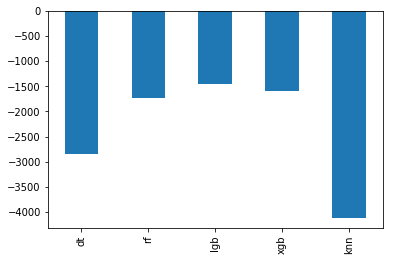

In [21]:
pd.Series(score).plot(kind='bar')

In [27]:
score

{'dt': -2846.653405827802,
 'rf': -1734.1320452619686,
 'lgb': -1459.1063573548472,
 'xgb': -1596.9389178327078,
 'knn': -4117.225244739443}

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [23]:
from sklearn.model_selection import train_test_split
x_trn,x_val,y_trn,y_val=train_test_split(x_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)
kfolds=KFold(n_splits=10,shuffle=True,random_state=10)

In [ ]:
scores=0
for idx_trn,idx_val in kfolds.split(train_tfs):
    

In [24]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)
count_predicted=forest.predict(x_test)
count_predicted

C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 74.6, 215.6,  91.7,  32.5,  56.9, 130.4, 215.1, 349.9,  40.8,
       110.4, 313.8, 270.6, 113.1,  46.6, 219.4, 143.4,  27.1, 165.1,
       388.3, 168. , 241.7,  73.1,  14.5, 135.4, 140.1, 128.5,  24.7,
       111.4, 115.5, 157.7,  67.5,  29.9,  73.1, 131.5, 248.1,  29.6,
       159.2, 129.1, 207.5,  90.1,  42.1, 130.2, 134.2,  86.4, 336.3,
       164.6,  83.2,  64.3,  16.8,  85.6, 231.5,  90.9, 170.8,  92.3,
       165.1, 134.9,  48.4, 177. ,  14.6,  19.3,  78.4,  99.2, 272.5,
       322.7, 139.1, 315.5,  16.2, 217.2, 140.7,  32.7, 117.2,  28.5,
       104.4,  14.6, 344.5, 211.4,  39.1, 207.8, 213.8,  18.7, 237.1,
       122.5,  62.8,  83.7, 113.7, 308.4,  54.1, 167.5,  93.4, 309.7,
       297.9, 154.1,  73.5, 110.3,  37.5,  65. ,  77.3,  25.1, 219. ,
       125.6,  14.6, 133.5,  42.7, 124.1,  68.7,  61.8,  99.9,  17.5,
       166.5, 118.3, 164.8, 183.9, 164.8, 135. ,  75.2, 147.6, 252.6,
        35.2, 178.7,  15.3, 111.4, 102.8, 160.6, 114.6,  47.3, 122.1,
        53.9,  16.3,